In [1]:
# Komórka 1: Setup
%matplotlib inline
import sys
sys.path.insert(0, '../src')

import numpy as np
import matplotlib.pyplot as plt
from signal_generators import (
    generate_random_signal,
    generate_periodic_signal,
    generate_lorenz_system
)

# Ustawienia
N = 50000
print(f"Generating {N} samples...")


Generating 50000 samples...


In [2]:
# Komórka 2: Test generatora sygnału losowego
random_sig = generate_random_signal(N, seed=42)
print(f"Random signal - Mean: {random_sig.mean():.4f}, Std: {random_sig.std():.4f}")

Random signal - Mean: 0.4989, Std: 0.2884


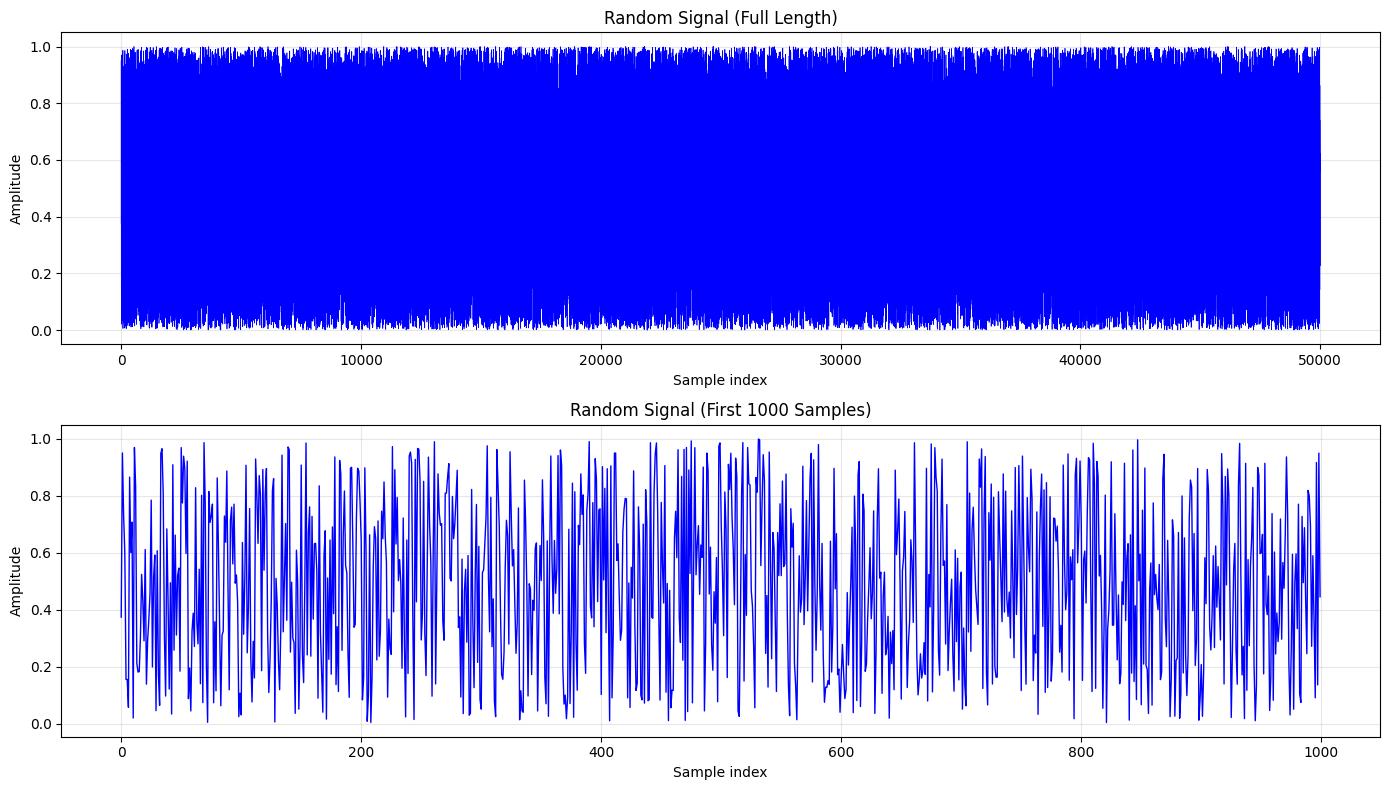

In [3]:
# Komórka 3: Wizualizacja sygnału losowego
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(random_sig, linewidth=0.5, color='blue')
axes[0].set_title('Random Signal (Full Length)')
axes[0].set_xlabel('Sample index')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

axes[1].plot(random_sig[:1000], linewidth=1, color='blue')
axes[1].set_title('Random Signal (First 1000 Samples)')
axes[1].set_xlabel('Sample index')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [4]:
# Komórka 4: Test generatora sygnału periodycznego
periodic_sig = generate_periodic_signal(N)
print(f"Periodic signal - Min: {periodic_sig.min():.4f}, Max: {periodic_sig.max():.4f}")

Periodic signal - Min: -2.0000, Max: 1.1250


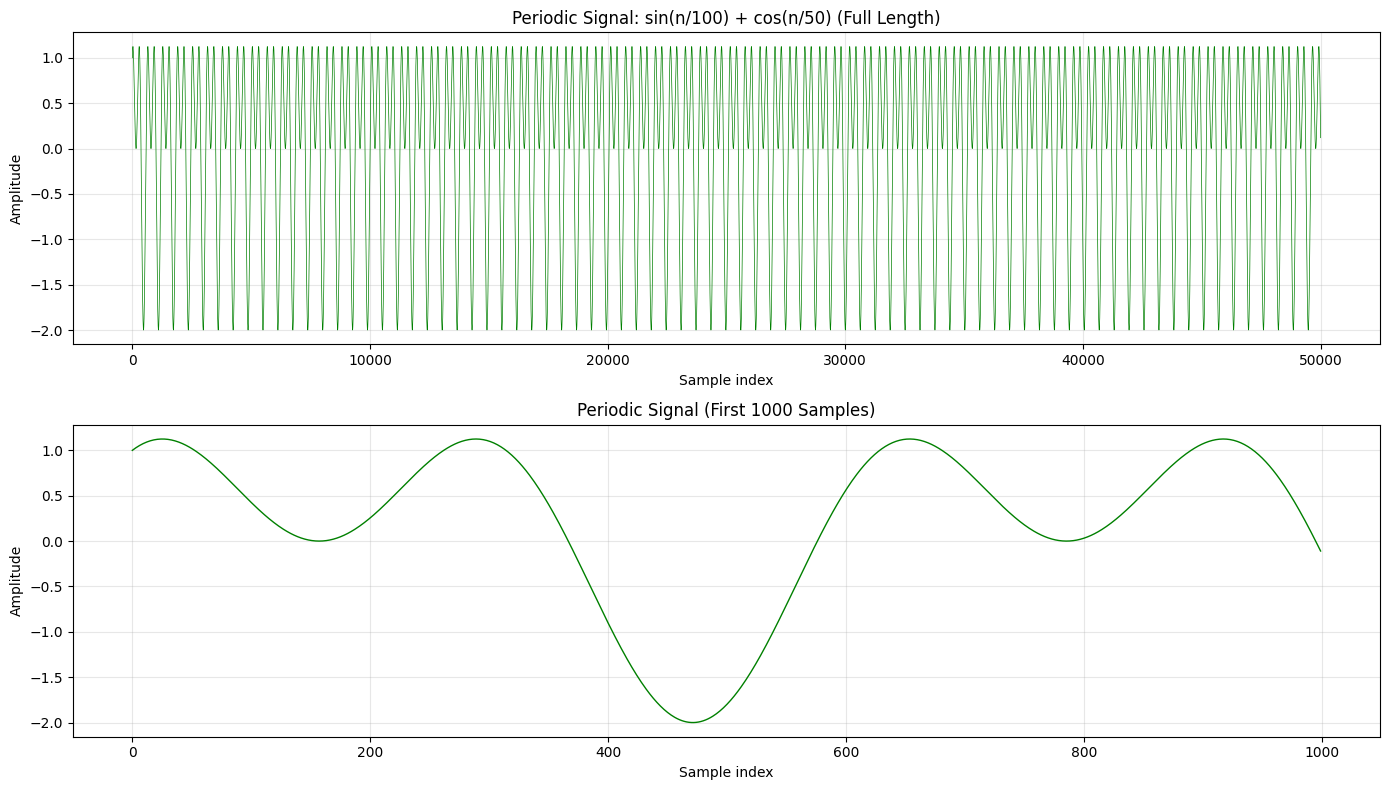

In [5]:
# Komórka 5: Wizualizacja sygnału periodycznego
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(periodic_sig, linewidth=0.5, color='green')
axes[0].set_title('Periodic Signal: sin(n/100) + cos(n/50) (Full Length)')
axes[0].set_xlabel('Sample index')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True, alpha=0.3)

axes[1].plot(periodic_sig[:1000], linewidth=1, color='green')
axes[1].set_title('Periodic Signal (First 1000 Samples)')
axes[1].set_xlabel('Sample index')
axes[1].set_ylabel('Amplitude')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
# Komórka 6: Generowanie systemu Lorenza
print("Generating Lorenz system... (this may take a moment)")
t, x, y, z = generate_lorenz_system(N)
print(f"Lorenz generated: {len(x)} samples, time range: [{t[0]:.2f}, {t[-1]:.2f}]")

Generating Lorenz system... (this may take a moment)
Lorenz generated: 50000 samples, time range: [0.00, 499.99]


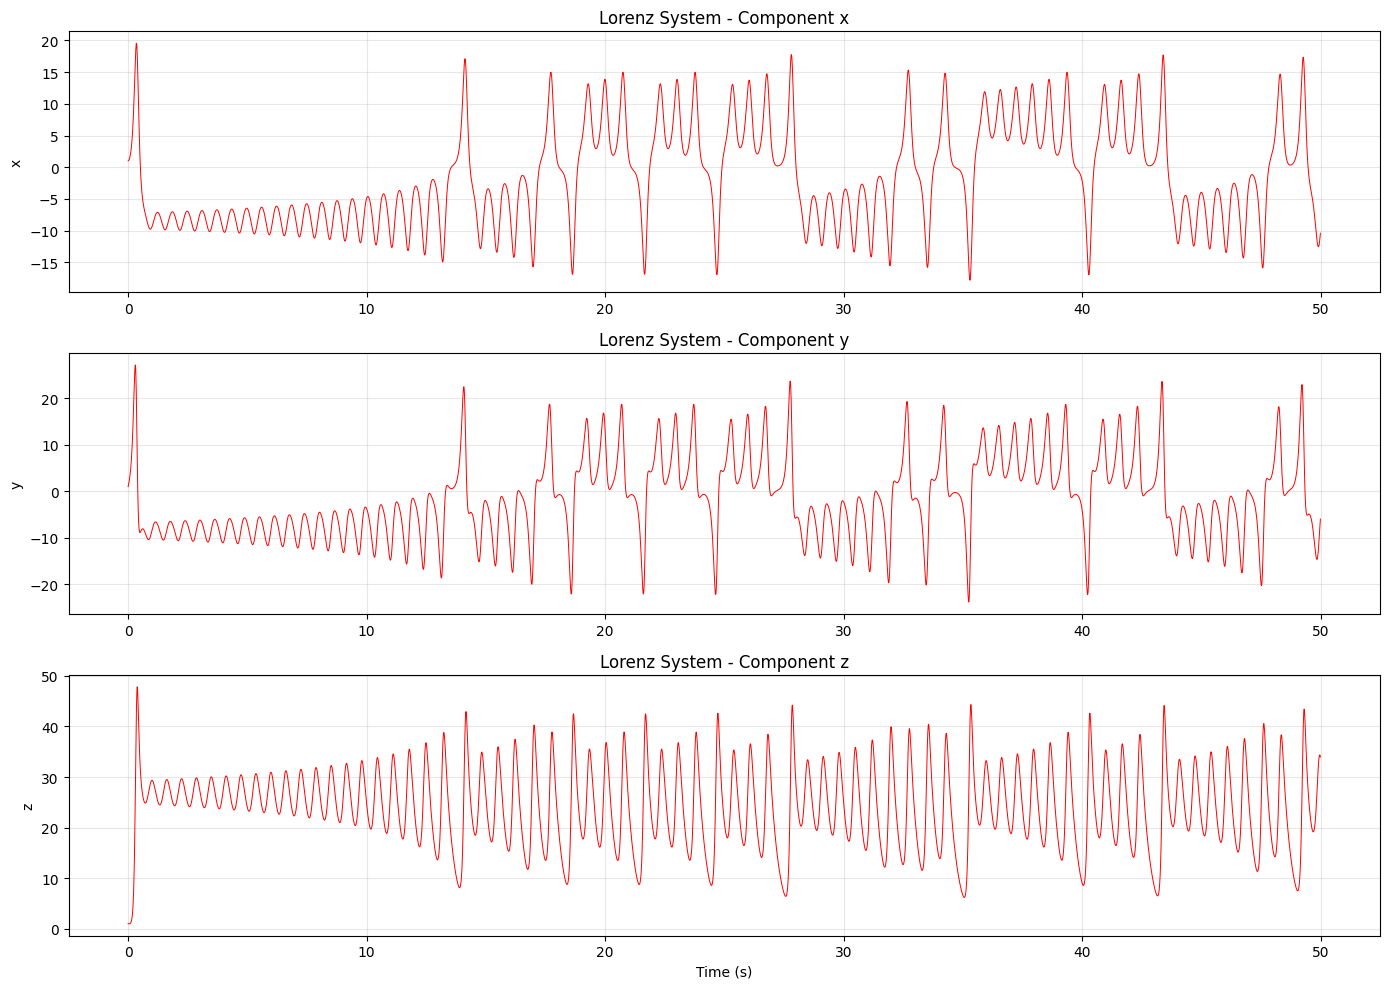

In [7]:
# Komórka 7: Wizualizacja szeregu czasowego Lorenza
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

for i, (var, data) in enumerate([('x', x), ('y', y), ('z', z)]):
    axes[i].plot(t[:5000], data[:5000], linewidth=0.7, color='red')
    axes[i].set_ylabel(f'{var}')
    axes[i].set_title(f'Lorenz System - Component {var}')
    axes[i].grid(True, alpha=0.3)

axes[2].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()


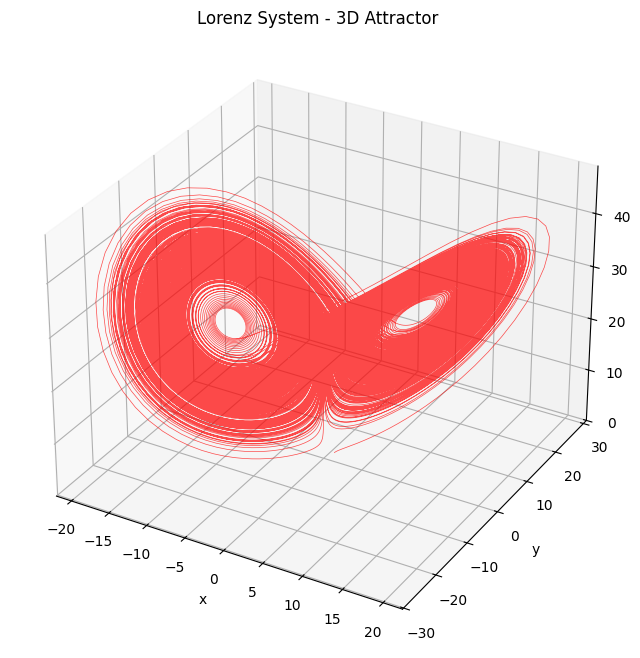

In [8]:
# Komórka 8: 3D atraktor Lorenza
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, linewidth=0.5, color='red', alpha=0.7)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz System - 3D Attractor')
plt.show()


In [9]:
# Komórka 9: Zapis danych do plików
import os

os.makedirs('../data/generated', exist_ok=True)
os.makedirs('../data/figures', exist_ok=True)

# Zapis sygnałów
np.save('../data/generated/signal_random.npy', random_sig)
np.save('../data/generated/signal_periodic.npy', periodic_sig)
np.save('../data/generated/lorenz_x.npy', x)
np.save('../data/generated/lorenz_y.npy', y)
np.save('../data/generated/lorenz_z.npy', z)
np.save('../data/generated/lorenz_t.npy', t)

print("Sygnały zapisane do data/generated/")


Sygnały zapisane do data/generated/


In [10]:
# Komórka 10: Podsumowanie
import pandas as pd

summary = pd.DataFrame({
    'Signal': ['Random', 'Periodic', 'Lorenz (x)', 'Lorenz (y)', 'Lorenz (z)'],
    'Samples': [N, N, len(x), len(y), len(z)],
    'Min': [random_sig.min(), periodic_sig.min(), x.min(), y.min(), z.min()],
    'Max': [random_sig.max(), periodic_sig.max(), x.max(), y.max(), z.max()],
    'Mean': [random_sig.mean(), periodic_sig.mean(), x.mean(), y.mean(), z.mean()],
    'Std': [random_sig.std(), periodic_sig.std(), x.std(), y.std(), z.std()]
})

print("\nSignal Summary Statistics:")
print(summary)



Signal Summary Statistics:
       Signal  Samples        Min        Max       Mean       Std
0      Random    50000   0.000006   0.999972   0.498863  0.288404
1    Periodic    50000  -2.000000   1.125000   0.004604  0.998389
2  Lorenz (x)    50000 -19.181190  19.555094   0.310106  7.936667
3  Lorenz (y)    50000 -26.412873  27.183493   0.310117  8.996186
4  Lorenz (z)    50000   0.961737  47.834027  23.640382  8.540741
